# Music recommender system

One of the most used machine learning algorithms is recommendation systems. A **recommender** (or recommendation) **system** (or engine) is a filtering system which aim is to predict a rating or preference a user would give to an item, eg. a film, a product, a song, etc.

Which type of recommender can we have?   

There are two main types of recommender systems: 
- Content-based filters
- Collaborative filters
  
> Content-based filters predicts what a user likes based on what that particular user has liked in the past. On the other hand, collaborative-based filters predict what a user like based on what other users, that are similar to that particular user, have liked.

We have previously developed a content-based recommendation system. Now, we'll look into collaborative filtering. 

### 2) Collaborative filters

Collaborative Filters work with an interaction matrix, also called rating matrix. The aim of this algorithm is to learn a function that can predict if a user will benefit from an item - meaning the user will likely buy, listen to, watch this item.

Among collaborative-based systems, we can encounter two types: **user-item** filtering and **item-item** filtering. 

*What algorithms do collaborative filters use to recommend new songs?* There are several machine learning algorithms that can be used in the case of collaborative filtering.

### Importing required libraries

First, we'll import all the required libraries.

In [48]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
from scipy.sparse import csr_matrix

In [51]:
import Recommenders as Recommenders

### Reading the files

We are going to use the Million Song Dataset, a freely-available collection of audio features and metadata for a million contemporary popular music tracks.

There are two files that will be interesting for us. The first of them will give us information about the songs. Particularly, it contains the user ID, song ID and the listen count. On the other hand, the second file will contain song ID, title of that song, release, artist name and year. 
We need to merge these two DataFrames. For that aim, we'll use the `song_ID` 

In [52]:
song_df_1 = pd.read_csv('triplets_file.csv')
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [53]:
song_df_2 = pd.read_csv('song_data.csv')
song_df_2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [54]:
# combine both data
songs = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on='song_id', how='left')
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [55]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


We'll save this dataset into a `csv file` so we have this available if there is any other recommendation system project we want to do.

In [56]:
songs.to_csv('songs.csv', index=False)

We can read this file into a new **DataFrame** that we'd call `df_songs`.

In [57]:
df_songs = pd.read_csv('songs.csv')

## Exploring the data

As usual, any data science or machine learning project starts with an exploratory data analysis (EDA). The aim of EDA is to understand and get insights on our data.

We'll first inspect the first rows of our `DataFrame`.

In [58]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


Then, we'll check how many observions there are in the dataset.

In [59]:
#Get total observations
print(f"There are {df_songs.shape[0]} observations in the dataset")

There are 2000000 observations in the dataset


Now, we should perform some cleaning steps. But looking at the dataset, we can see that there is no missing values.

In [60]:
df_songs.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

And most of the columns contain strings.

In [61]:
df_songs.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

Let's start exploring some characteristics of the dataset: 

- Unique songs:

In [62]:
#Unique songs
unique_songs = df_songs['title'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 9567 unique songs in the dataset


- Unique artists:

In [63]:
#Unique artists
unique_artists = df_songs['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")

There are 3375 unique artists in the dataset


- Unique users:

In [64]:
#Unique users
unique_users = df_songs['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 76353 unique users in the dataset


We'll go ahead and explore the popularity of songs and artists.

### Most popular songs

How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. Note that while we are using  `listen_count`, we only care about the number of rows, we don't consider the number present in that row. This number represents how many times one user listen to the same song.

In [65]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = df_songs.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count', 'title'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100, 2)

In [66]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,title,listen_count,percentage
6836,Sehr kosmisch,8277,0.41
8725,Undo,7032,0.35
1964,Dog Days Are Over (Radio Edit),6949,0.35
9496,You're The One,6729,0.34
6498,Revelry,6145,0.31
6825,Secrets,5841,0.29
3437,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,0.27
2595,Fireflies,4795,0.24
3322,Hey_ Soul Sister,4758,0.24
8494,Tive Sim,4548,0.23


In [67]:
labels = ten_pop_songs['title'].tolist()
counts = ten_pop_songs['listen_count'].tolist()

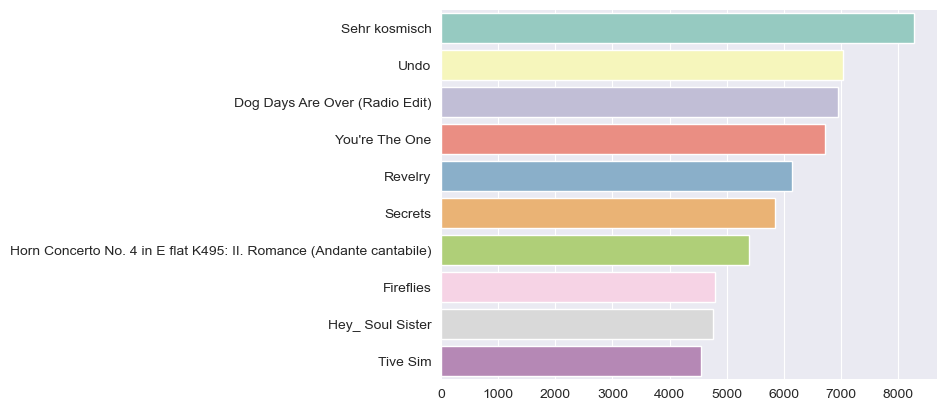

In [68]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

### Most popular artist

For the next task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [69]:
#count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

In [70]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,artist_name,listen_count
649,Coldplay,29422
2850,The Black Keys,19862
1651,Kings Of Leon,18747
1107,Florence + The Machine,18112
1370,Jack Johnson,17801
2946,The Killers,16063
2374,Radiohead,14890
736,Daft Punk,14715
2073,Muse,14005
1554,Justin Bieber,13959


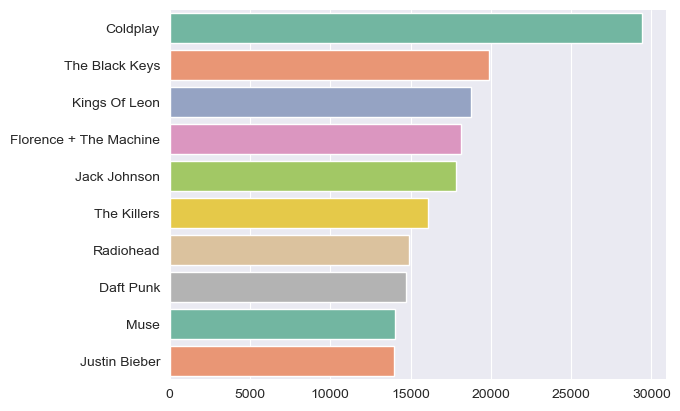

In [71]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

### Listen count by user

We can also get some other information from the feature `listen_count`. We will answer the folloging questions:

**What was the maximum time the same user listen to a same song?**

In [72]:
listen_counts = pd.DataFrame(df_songs.groupby('listen_count').size(), columns=['count'])

In [73]:
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 2213


**How many times on average the same user listen to a same song?**

In [74]:
print(f"On average, a user listen to the same song {df_songs['listen_count'].mean()} times")

On average, a user listen to the same song 3.0454845 times


We can also check the distribution of `listen_count`:

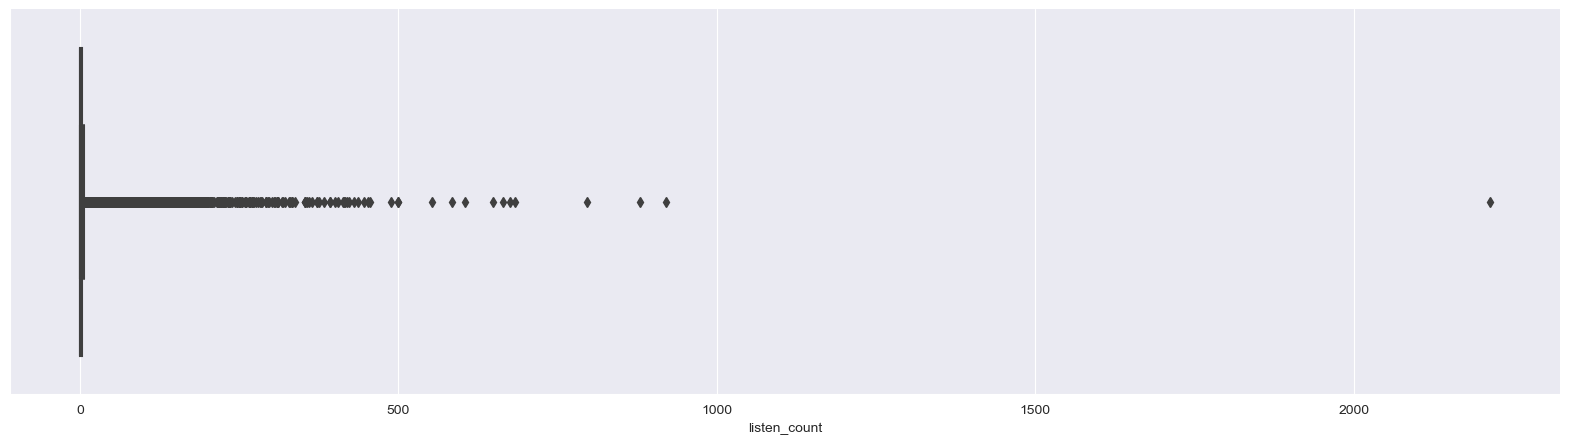

In [75]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='listen_count', data=df_songs)
sns.despine()

**What are the most frequent number of times a user listen to the same song?**

In [76]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)

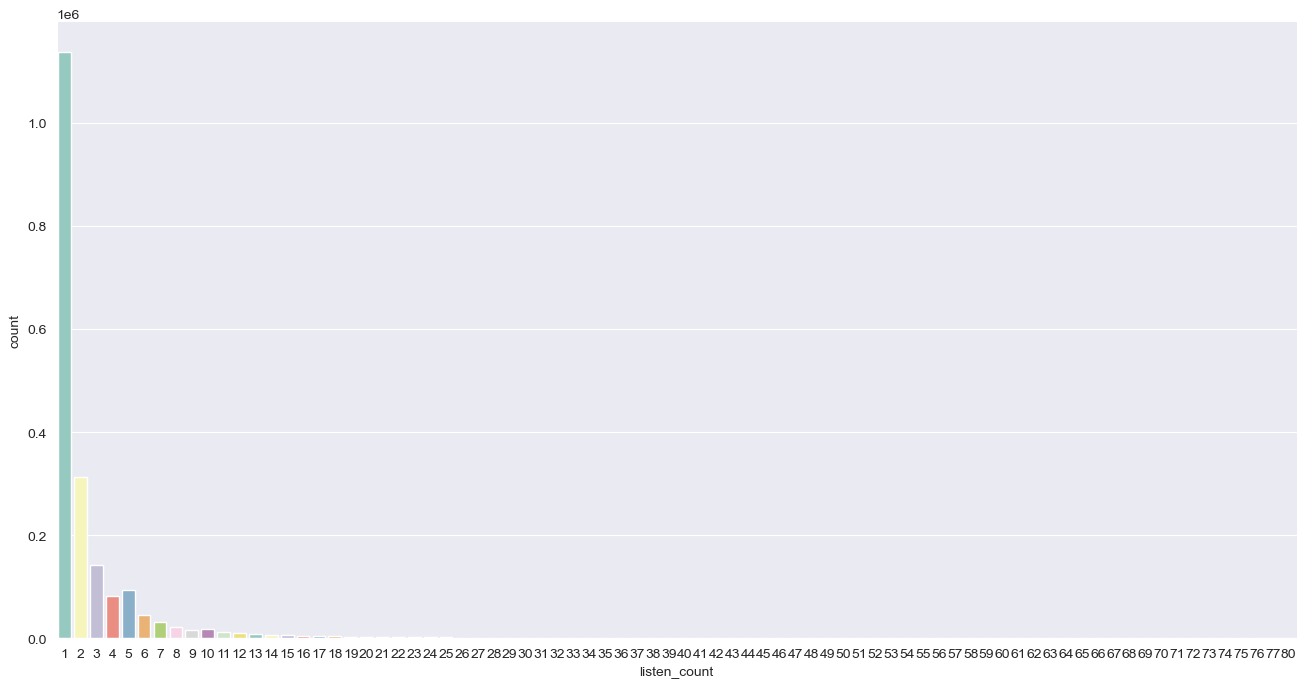

In [77]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

**How many songs does a user listen in average?**

In [78]:
song_user = df_songs.groupby('user_id')['song_id'].count()

C:\Users\Ayyappa Swamy\AppData\Local\Temp\ipykernel_28976\3357008667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='orange')


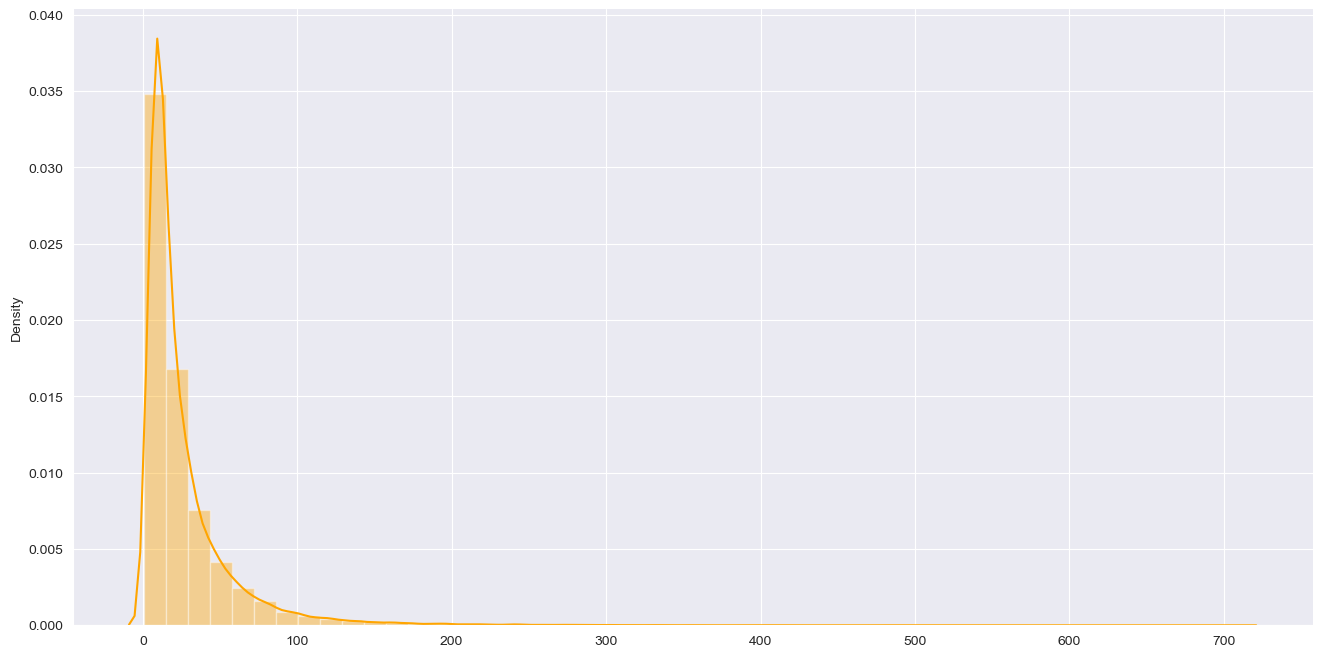

In [79]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [80]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 26.194124657839247 songs


In [81]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 16.0 songs, with minimum 1 and maximum 711 songs


## Data Preprocessing

In [82]:
# creating new feature combining title and artist name
df_songs['song'] = df_songs['title']+' - '+df_songs['artist_name']
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


short samples

In [83]:
# taking top 10k samples for quick results
df_songs = df_songs.head(10000)

In [84]:
# cummulative sum of listen count of the songs
song_grouped = df_songs.groupby(['song']).agg({'listen_count':'count'}).reset_index()
song_grouped.head()

,song,listen_count
0,#40 - DAVE MATTHEWS BAND,1
1,& Down - Boys Noize,4
2,'97 Bonnie & Clyde - Eminem,2
3,'Round Midnight - Miles Davis,3
4,'Till I Collapse - Eminem / Nate Dogg,6


In [85]:
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = (song_grouped['listen_count'] / grouped_sum ) * 100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


## Popularity Based Recommendation

In [86]:
pr = Recommenders.popularity_recommender_py()

In [87]:
pr.create(df_songs, 'user_id', 'song')

In [88]:
# display the top 10 popular songs
pr.recommend(df_songs['user_id'][5])

,user_id,song,score,Rank
3660,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,45,1.0
4678,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,32,2.0
5105,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,32,3.0
1071,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,28,5.0
4378,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The Scientist - Coldplay,27,6.0
4712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Use Somebody - Kings Of Leon,27,7.0
3476,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,26,8.0
1387,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,24,9.0
1862,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


In [89]:
pr.recommend(df_songs['user_id'][100])

,user_id,song,score,Rank
3660,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,45,1.0
4678,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,32,2.0
5105,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,32,3.0
1071,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,28,4.0
3655,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,28,5.0
4378,e006b1a48f466bf59feefed32bec6494495a4436,The Scientist - Coldplay,27,6.0
4712,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,27,7.0
3476,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,26,8.0
1387,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,24,9.0
1862,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,23,10.0


## Item based popularity

In [90]:
ir = Recommenders.item_similarity_recommender_py()
ir.create(df_songs, 'user_id', 'song')

In [91]:
user_items = ir.get_user_items(df_songs['user_id'][5])

In [92]:
# display user songs history
for user_item in user_items:
    print(user_item)

The Cove - Jack Johnson
Entre Dos Aguas - Paco De Lucia
Stronger - Kanye West
Constellations - Jack Johnson
Learn To Fly - Foo Fighters
Apuesta Por El Rock 'N' Roll - Héroes del Silencio
Paper Gangsta - Lady GaGa
Stacked Actors - Foo Fighters
Sehr kosmisch - Harmonia
Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
Let It Be Sung - Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams
I'll Be Missing You (Featuring Faith Evans & 112)(Album Version) - Puff Daddy
Love Shack - The B-52's
Clarity - John Mayer
I?'m A Steady Rollin? Man - Robert Johnson
The Old Saloon - The Lonely Island
Behind The Sea [Live In Chicago] - Panic At The Disco
Champion - Kanye West
Breakout - Foo Fighters
Ragged Wood - Fleet Foxes
Mykonos - Fleet Foxes
Country Road - Jack Johnson / Paula Fuga
Oh No - Andrew Bird
Love Song For No One - John Mayer
Jewels And Gold - Angus & Julia Stone
Warning - Incubus
83 - John Mayer
Neon - John Mayer
The Middle - Jimmy Eat World
High and 

In [93]:
# give song recommendation for that user
ir.recommend(df_songs['user_id'][5])

No. of unique songs for the user: 45
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :6844


,user_id,song,score,rank
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oliver James - Fleet Foxes,0.043076,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Quiet Houses - Fleet Foxes,0.043076,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Your Protector - Fleet Foxes,0.043076,3
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tiger Mountain Peasant Song - Fleet Foxes,0.043076,4
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sun It Rises - Fleet Foxes,0.043076,5
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,The End - Pearl Jam,0.037531,6
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,St. Elsewhere - Dave Grusin,0.037531,7
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Misled - Céline Dion,0.037531,8
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Oil And Water - Incubus,0.037531,9
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Meadowlarks - Fleet Foxes,0.037531,10


In [94]:
# give related songs based on the words
ir.get_similar_items(['Oliver James - Fleet Foxes', 'The End - Pearl Jam'])

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :75


,user_id,song,score,rank
0,,Quiet Houses - Fleet Foxes,0.75,1
1,,St. Elsewhere - Dave Grusin,0.75,2
2,,Misled - Céline Dion,0.75,3
3,,Your Protector - Fleet Foxes,0.75,4
4,,Oil And Water - Incubus,0.75,5
5,,Tiger Mountain Peasant Song - Fleet Foxes,0.75,6
6,,Meadowlarks - Fleet Foxes,0.75,7
7,,Sun It Rises - Fleet Foxes,0.75,8
8,,Id Die Without You - P.M. Dawn,0.75,9
9,,Meet Virginia - Train,0.75,10
